# 1. Importando bibliotecas

In [53]:
# !pip install pandas_ta
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas_ta
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [55]:
from funcoes import *
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf
import pandas as pd
import time
from decimal import Decimal
from datetime import date
import os

# 2. Obtendo os dados historicos das ações

## 2.1 Parâmetros

In [60]:
lista_acoes = [    
    'PETR4.SA',    # Petrobras
    'TAEE11.SA',   # Taesa    
    'NVDA',        # Nvidia
    'BBAS3.SA',    # Bradesco
    'NFLX',        # Netflix     
    'EA',          # EA
    'TSLA']        # Tesla


data_inicio = '2020-01-01' # data de inicio do historico que voce deseja obter
data_fim = date.today()   # data final do perido para o historico
# FORMATO-> "AAAA-MM-DD" 

In [61]:
%%time

hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA

"""
    Informacao sobre os dados historicos gerados:
        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> 
            "Date"     : representa a data do registro no formato "AAAA-MM-DD"
            "Open"     : Preco de abertura do dia
            "High"     : Preco mais alto do dia
            "Low"      : Preco mais baixo do dia
            "Close"    : Preco de fechamendo do dia
            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)
            "Volume"   : Representa o numero total de acoes negociadas durante o dia
"""


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CPU times: total: 188 ms
Wall time: 208 ms


'\n    Informacao sobre os dados historicos gerados:\n        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> \n            "Date"     : representa a data do registro no formato "AAAA-MM-DD"\n            "Open"     : Preco de abertura do dia\n            "High"     : Preco mais alto do dia\n            "Low"      : Preco mais baixo do dia\n            "Close"    : Preco de fechamendo do dia\n            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)\n            "Volume"   : Representa o numero total de acoes negociadas durante o dia\n'

# 3. Indicadores técnicos

### 3.1 SMA

In [62]:
%%time

MM_sma(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'SMA'(SIMPLE MOVING AVERAGE ou MEDIA MOVEL SIMPLES)

CPU times: total: 62.5 ms
Wall time: 82.5 ms


### 3.2 EMA

In [63]:
%%time

MM_ema(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'EMA'(EXPONENTIAL MOVING AVERAGE ou MEDIA MOVEL EXPONENCIAL)

CPU times: total: 109 ms
Wall time: 83.9 ms


### 3.3 RSI

In [64]:
%%time

MM_rsi(lista_acoes)

CPU times: total: 109 ms
Wall time: 107 ms


### 3.4 MACD

In [65]:
%%time

MM_macd(lista_acoes)

CPU times: total: 141 ms
Wall time: 142 ms


### 3.5 Bollinger Bands

In [66]:
%%time

MM_bb(lista_acoes) # FUNCAO PARA OBTER OS INDICADORES BB(Bollinger Band) dos ativos

CPU times: total: 156 ms
Wall time: 147 ms


### 3.6 ATR

In [67]:
%%time

MM_atr(lista_acoes) # FUNCAO PARA OBTER O INDICADOR "ATR" (AVERAGE TRUE RANGE)

CPU times: total: 172 ms
Wall time: 173 ms


### 3.7 Indicador Estocástico

In [68]:
%%time

MM_estc(lista_acoes)

CPU times: total: 188 ms
Wall time: 192 ms


### 3.8 Renomeação de arquivo  

In [69]:
caminho_pasta = 'Base_dados'
# Pega o nome dos arquivos da pasta e armazena numa lista\n,

for nome_arquivo in os.listdir(caminho_pasta):
    # Verifica se o arquivo termina com ".SA"
    if nome_arquivo.endswith(".SA"):
        # Gera o novo nome sem o ".SA"
        novo_nome = nome_arquivo[:-3]
        # Caminho completo para o arquivo antigo e o novo nome
        caminho_antigo = os.path.join(caminho_pasta, nome_arquivo)
        caminho_novo = os.path.join(caminho_pasta, novo_nome)
        # Renomeia o arquivo
        os.rename(caminho_antigo, caminho_novo)
        print(f"Arquivo renomeado: {nome_arquivo} -> {novo_nome}")

Arquivo renomeado: hist_BBAS3.SA -> hist_BBAS3
Arquivo renomeado: hist_PETR4.SA -> hist_PETR4
Arquivo renomeado: hist_TAEE11.SA -> hist_TAEE11


# 4. Data Wrangling

### 4.1 Removendo colunas que não serão usadas

In [70]:
%%time

lista_colunas = ['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0']
# Defina o caminho da pasta\n
caminho_pasta = 'Base_dados'
# Pega o nome dos arquivos da pasta e armazena numa lista\n,
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}") 
    df = df.drop(columns=lista_colunas)
    df = df.set_index('Date')
    df.dropna(inplace=True)  # Remove linhas com valores ausentes
    df.to_csv(f"Base_dados/{arq}") # Salvando o resultado no DataFrame

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    print(df)

hist_BBAS3
            Date       Open       High        Low      Close  Adj Close  \
0     2020-01-29  25.500000  25.690001  24.680000  24.730000  17.876265   
1     2020-01-30  24.350000  24.995001  24.184999  24.900000  17.999149   
2     2020-01-31  24.555000  24.559999  24.110001  24.270000  17.543753   
3     2020-02-03  24.275000  24.570000  24.004999  24.389999  17.630493   
4     2020-02-04  24.645000  24.799999  24.125000  24.125000  17.438940   
...          ...        ...        ...        ...        ...        ...   
1155  2024-09-18  28.270000  28.540001  28.139999  28.250000  28.250000   
1156  2024-09-19  28.360001  28.440001  27.910000  27.910000  27.910000   
1157  2024-09-20  27.900000  27.950001  27.459999  27.500000  27.500000   
1158  2024-09-23  27.500000  27.549999  27.270000  27.400000  27.400000   
1159  2024-09-24  27.700001  27.920000  27.370001  27.379999  27.379999   

        Volume   SMA_10     EMA_10     RSI_10      MACD  MACD_Histogram  \
0     1680040

### 4.2 Convertendo os valores das Colunas

In [75]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
nome_colunas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
#nomes_dascolunas = df.columns.tolist()
lista_colunas = ['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0']
caminho_pasta = 'Base_dados'
# Pega o nome dos arquivos da pasta e armazena numa lista\n,
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    for col in nome_colunas:
        df[col] = df[col].astype(float)  # Converte uma coluna em float
        df.to_csv(f"Base_dados/{arq}") #Salvando o resultado no DataFrame
    df['NOME_ACAO'] = arq

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    print(df)


hist_BBAS3
hist_EA
hist_NFLX
hist_NVDA
hist_PETR4
hist_TAEE11
hist_TSLA


NameError: name 'removeColunas' is not defined

### 4.4 Descobrir se há Outliers

Axes(0.125,0.11;0.775x0.77)
Open


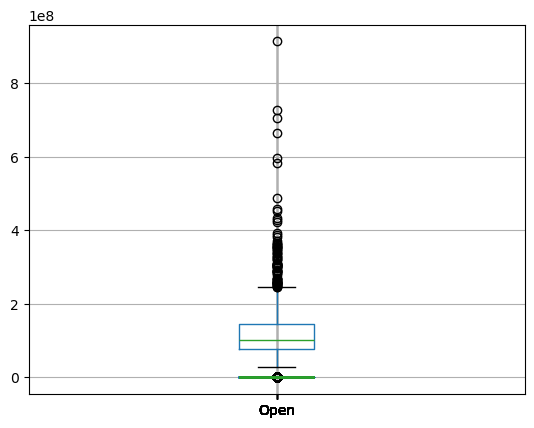

Axes(0.125,0.11;0.775x0.77)
High


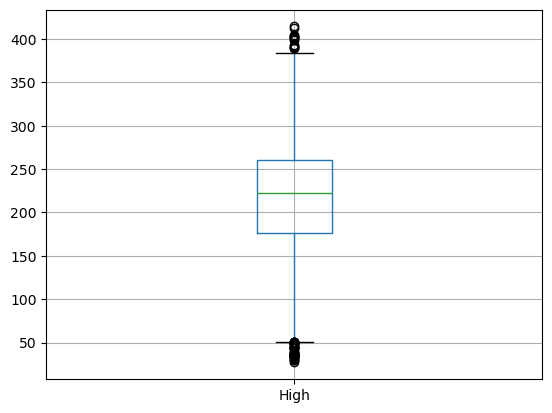

Axes(0.125,0.11;0.775x0.77)
Low


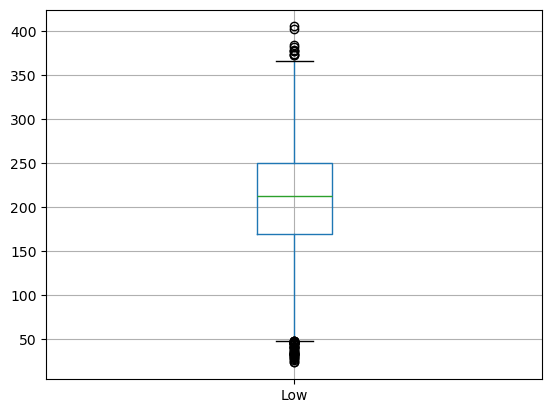

Axes(0.125,0.11;0.775x0.77)
Close


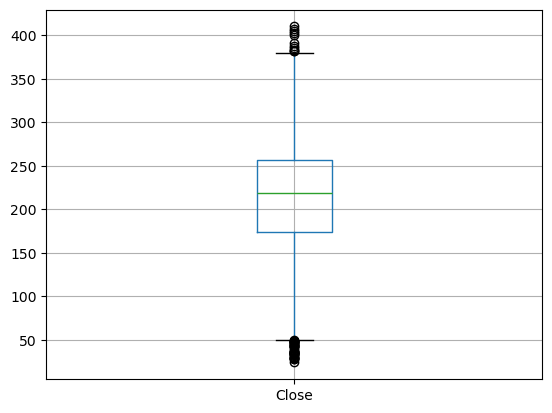

Axes(0.125,0.11;0.775x0.77)
Adj Close


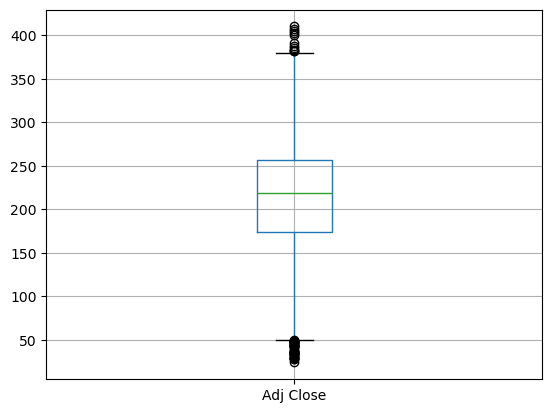

Axes(0.125,0.11;0.775x0.77)
Volume


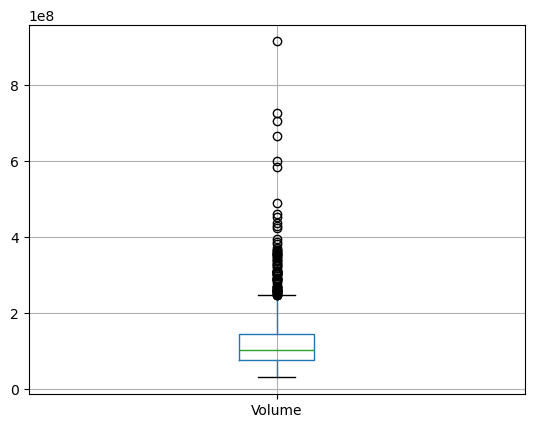

Axes(0.125,0.11;0.775x0.77)
SMA_10


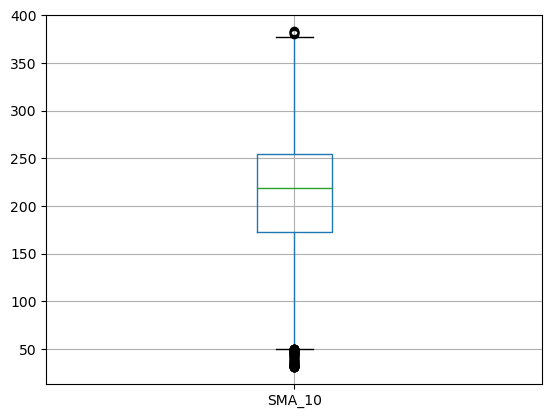

Axes(0.125,0.11;0.775x0.77)
EMA_10


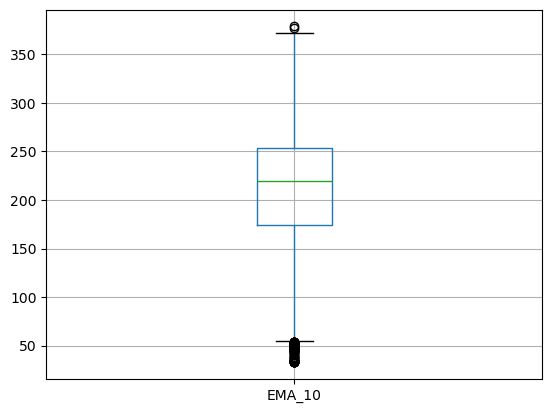

Axes(0.125,0.11;0.775x0.77)
RSI_10


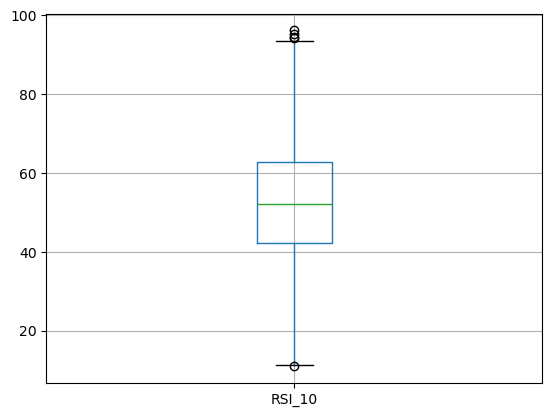

Axes(0.125,0.11;0.775x0.77)
MACD


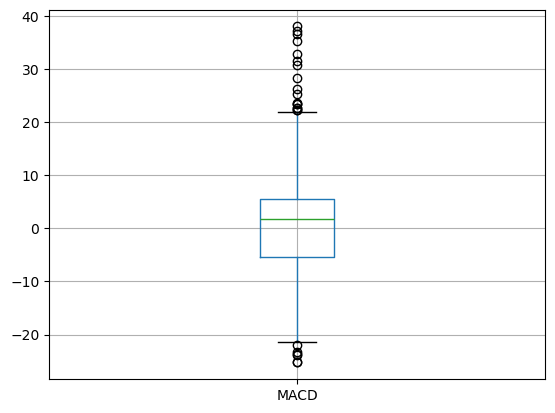

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


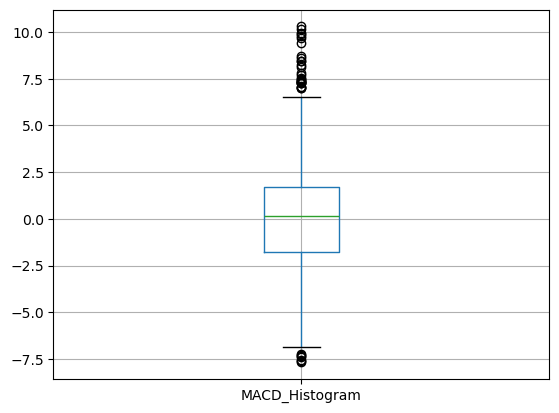

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


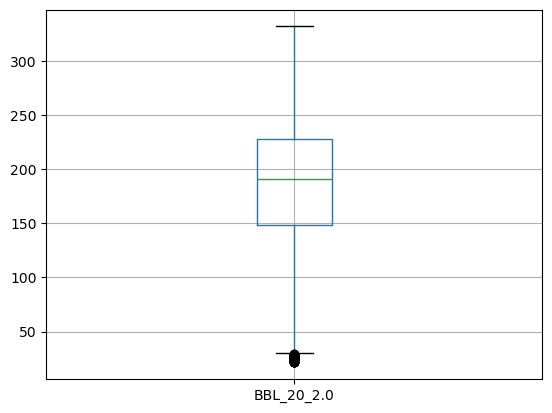

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


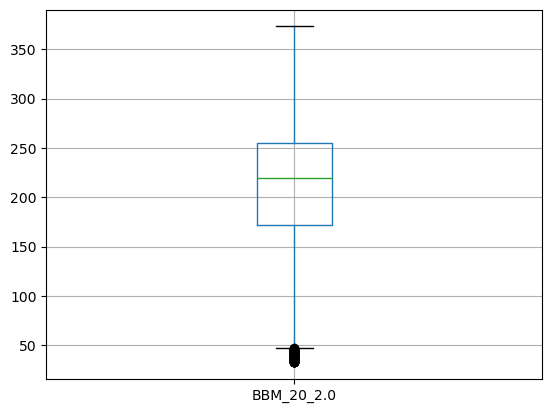

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


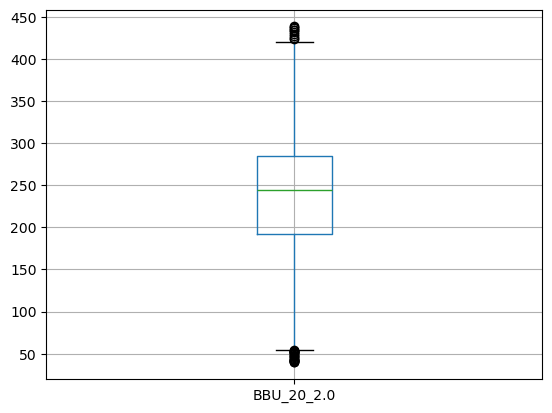

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


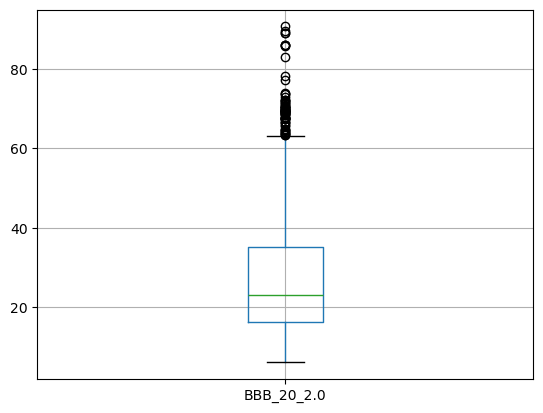

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


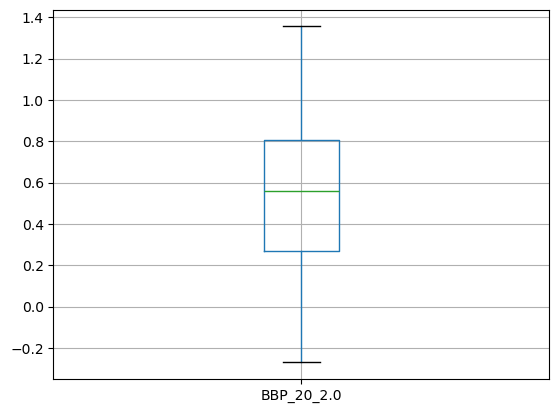

Axes(0.125,0.11;0.775x0.77)
ATRr_14


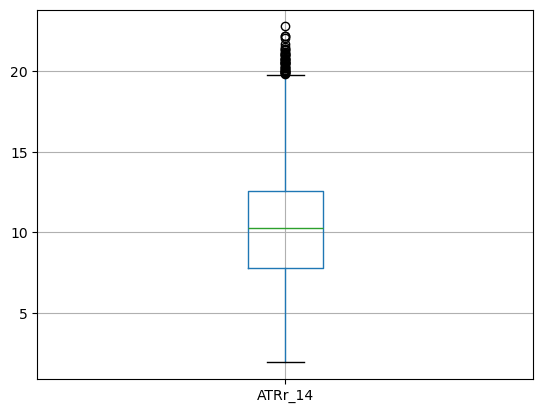

Axes(0.125,0.11;0.775x0.77)
stoch_k


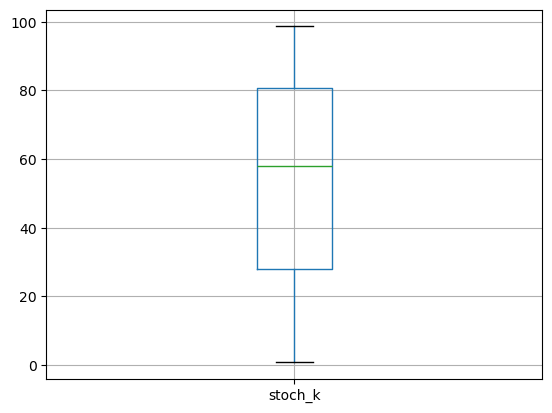

Axes(0.125,0.11;0.775x0.77)
stoch_d


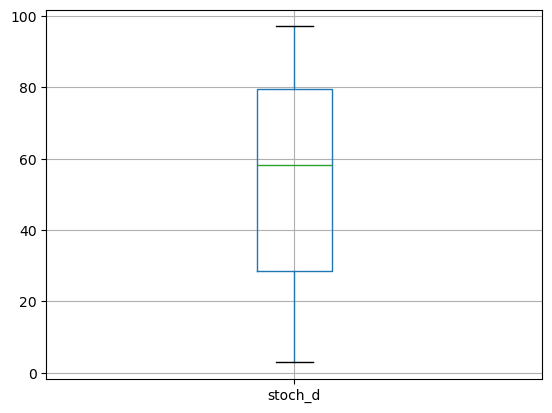

In [42]:
for colout in nome_colunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()
    

In [36]:
# lista_arquivos VARIÁVEL COM O NOME DAS BASES

# Colunas para tratar os outliers
print(type(df))
print(df)

# Laço para percorrer cada base de dados
for i, df in enumerate(lista_arquivos):
    print(f"Tratando base de dados {i + 1}")
    
    # Percorrer cada coluna que precisa ser tratada
    for coluna in colunas_para_tratar:
        # Calcular o IQR para a coluna atual
        print(coluna)
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Marcar os outliers como NaN
        df[coluna] = df[coluna].apply(lambda x: None if (x < limite_inferior or x > limite_superior) else x)

        # Interpolar os valores NaN (outliers) usando interpolação linear
        df[coluna] = df[coluna].interpolate()

    # Exibir uma amostra da base tratada para verificação
    print(df.head())



# # Exemplo com uma coluna de dados 'SMA_10'
# Q1 = df['Volume'].quantile(0.25)
# Q3 = df['Volume'].quantile(0.75)
# IQR = Q3 - Q1

# limite_inferior = Q1 - 1.5 * IQR
# limite_superior = Q3 + 1.5 * IQR

# # Marcar os outliers como NaN
# df['Volume'] = df['Volume'].apply(lambda x: None if (x < limite_inferior or x > limite_superior) else x)

# # Interpolar os valores NaN (outliers) usando interpolação linear
# df['Volume'] = df['Volume'].interpolate()

# # Filtrar e armazenar os outliers
# # df = df[(df['Volume'] > limite_inferior) & (df['Volume'] < limite_superior)]

# # print(limite_superior)
# # print(limite_inferior)

# # df.boxplot(column='Volume')
# plt.show()
# df.head(20)

# # # Exibir os outliers
# # print(outliers)

# # # Opcional: Salvar os outliers em um arquivo CSV
# # outliers.to_csv('outliers_Volume.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
      Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        Date  \
0                0             0             0           0  2020-01-30   
1                1             1             1           1  2020-01-31   
2                2             2             2           2  2020-02-03   
3                3             3             3           3  2020-02-04   
4                4             4             4           4  2020-02-05   
...            ...           ...           ...         ...         ...   
1166          1166          1166          1166        1166  2024-09-18   
1167          1167          1167          1167        1167  2024-09-19   
1168          1168          1168          1168        1168  2024-09-20   
1169          1169          1169          1169        1169  2024-09-23   
1170          1170          1170          1170        1170  2024-09-24   

            Open        High         Low       Close   Adj Close  ...  \


NameError: name 'colunas_para_tratar' is not defined

In [18]:
df.info()
#opa

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 2020-01-31 to 2023-12-29
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            925 non-null    float64
 1   High            925 non-null    float64
 2   Low             925 non-null    float64
 3   Close           925 non-null    float64
 4   Adj Close       925 non-null    float64
 5   Volume          925 non-null    float64
 6   SMA_10          925 non-null    float64
 7   EMA_10          925 non-null    float64
 8   RSI_10          925 non-null    float64
 9   MACD            925 non-null    float64
 10  MACD_Histogram  925 non-null    float64
 11  BBL_20_2.0      925 non-null    float64
 12  BBM_20_2.0      925 non-null    float64
 13  BBU_20_2.0      925 non-null    float64
 14  BBB_20_2.0      925 non-null    float64
 15  BBP_20_2.0      925 non-null    float64
 16  ATRr_14         925 non-null    float64
 17  stoch_k         925 non-

In [20]:
print("teste")

teste
